# Pose Overlay Video
This notebook demonstrates how to:
1. Download a badminton video
2. Extract frames
3. Analyze poses using MediaPipe
4. Visualize landmark motion

In [1]:
import sys
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Add the src folder to the system path
sys.path.append(os.path.abspath('../src'))

from download_video import download_video
from extract_frames import extract_frames
from analyze_pose import analyze_poses

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

I0000 00:00:1755702790.396593  497015 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M1


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [2]:
# 📥 Step 1: Download a YouTube Video
video_url = "https://www.youtube.com/watch?v=9wSMlVsdPfs"  # Replace this
video_dir = download_video(video_url) # Download the video. Function returns the dir to the downloaded video.mp4 file.

W0000 00:00:1755702790.520602  497236 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1755702790.538527  497242 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


[youtube] Extracting URL: https://www.youtube.com/watch?v=9wSMlVsdPfs
[youtube] 9wSMlVsdPfs: Downloading webpage
[youtube] 9wSMlVsdPfs: Downloading tv client config
[youtube] 9wSMlVsdPfs: Downloading tv player API JSON
[youtube] 9wSMlVsdPfs: Downloading ios player API JSON
[youtube] 9wSMlVsdPfs: Downloading m3u8 information
[info] Testing format 614
[info] 9wSMlVsdPfs: Downloading 1 format(s): 614
[download] ../data/videos/16f4e9bce30465e27a1733c76b857886406430be608853c458a50ae5fb5f7828/video.mp4 has already been downloaded
[download] 100% of   90.93MiB


In [3]:
# 🖼️ Step 2: Extract Frames
frame_dir = f'{video_dir}/frames'

# Only extract if no frames are found
if not os.path.exists(frame_dir) or not glob.glob(os.path.join(frame_dir, '*.jpg')):
    extract_frames(os.path.join(video_dir, 'video.mp4'), frame_dir)
else:
    print(f"Frames already extracted in {frame_dir}")

Frames already extracted in ../data/videos/16f4e9bce30465e27a1733c76b857886406430be608853c458a50ae5fb5f7828/frames


In [4]:
# 🧍 Step 3: Analyze Pose
pose_csv_path = f"{video_dir}/pose_data.csv"

if not os.path.exists(pose_csv_path):
    analyze_poses(frame_dir=frame_dir, output_csv=pose_csv_path)
else:
    print(f"Pose data already exists at {pose_csv_path}")

Pose data already exists at ../data/videos/16f4e9bce30465e27a1733c76b857886406430be608853c458a50ae5fb5f7828/pose_data.csv


In [5]:
# 📊 Step 4: Load and Inspect Pose Data
df = pd.read_csv(pose_csv_path)
df.head()

,frame,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,...,z_29,x_30,y_30,z_30,x_31,y_31,z_31,x_32,y_32,z_32
0,frame_1000.jpg,0.549377,0.532708,0.069814,0.547049,0.526331,0.062362,0.545964,0.526174,0.062346,...,0.009458,0.535447,0.813024,0.044641,0.458691,0.810567,0.005940,0.557274,0.820216,0.056457
1,frame_10000.jpg,0.641711,0.524037,0.083648,0.639992,0.518382,0.071691,0.638901,0.518131,0.071646,...,0.060407,0.666084,0.718131,0.034752,0.598704,0.744511,0.053036,0.674926,0.720108,0.032878
2,frame_10010.jpg,0.556342,0.510115,0.055004,0.553989,0.504765,0.039842,0.553046,0.504767,0.039832,...,0.088004,0.608336,0.730268,0.213441,0.526763,0.746763,0.095791,0.607641,0.745562,0.228767
3,frame_10015.jpg,0.522587,0.504216,0.094295,0.521828,0.496298,0.079233,0.520817,0.496094,0.079207,...,-0.064836,0.579096,0.738883,0.030355,0.484812,0.783830,-0.070730,0.578242,0.751865,0.039625
4,frame_10020.jpg,0.493729,0.496947,0.163933,0.492046,0.491520,0.155497,0.491004,0.491888,0.155464,...,-0.170659,0.538669,0.760452,-0.176452,0.481149,0.779798,-0.180020,0.537308,0.770508,-0.186429


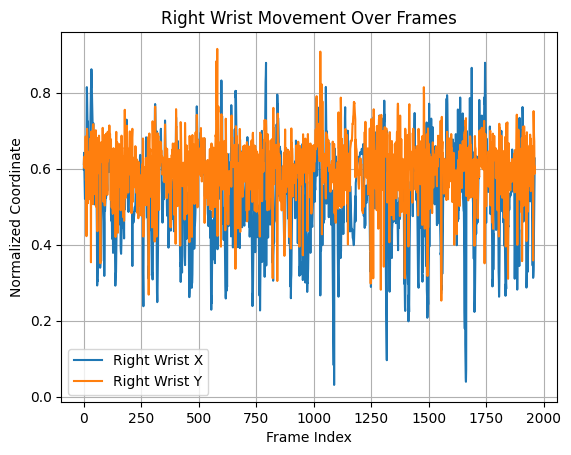

In [6]:
# 📈 Step 5: Visualize Right Wrist Movement
plt.plot(df["x_16"], label="Right Wrist X")
plt.plot(df["y_16"], label="Right Wrist Y")
plt.legend()
plt.title("Right Wrist Movement Over Frames")
plt.xlabel("Frame Index")
plt.ylabel("Normalized Coordinate")
plt.grid(True)
plt.show()

I0000 00:00:1755702793.005699  497015 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M1
W0000 00:00:1755702793.120053  497283 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1755702793.136233  497283 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1755702793.153089  497285 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


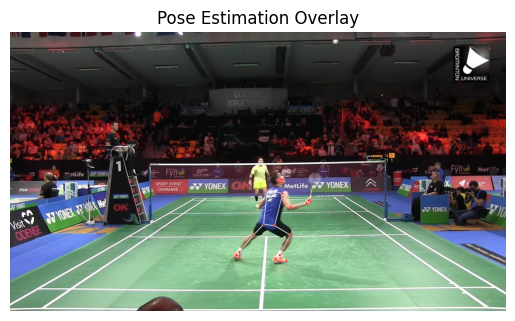

In [7]:
# ✅ Optional: Pose Overlay on One Frame
import cv2
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

frame_path = f"{frame_dir}/frame_1000.jpg"  # Adjust frame number
img = cv2.imread(frame_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pose = mp_pose.Pose(static_image_mode=True)
results = pose.process(img_rgb)

if results.pose_landmarks:
    mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Pose Estimation Overlay")
    plt.show()
else:
    print("No pose detected.")

In [10]:
# Pose Overlay Video ✅ Option 2: OpenCV Window (Real-time Playback, Local Only)

video_path = f'{video_dir}/video.mp4'
cap = cv2.VideoCapture(video_path)
pose = mp.solutions.pose.Pose()
mp_drawing = mp.solutions.drawing_utils

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(rgb)

    if results.pose_landmarks:
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp.solutions.pose.POSE_CONNECTIONS)

    cv2.imshow("Pose Detection", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

I0000 00:00:1755702880.438474  497015 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M1
W0000 00:00:1755702880.525284  498615 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1755702880.546475  498615 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


## Conclusion

Minor conclusions: 
- The mediapipe model seems more specialized for rather detailed and fine-grained poses for use cases, e.g. sign language detection. 
- It seems to perform worse for estimating more dynamic poses like in fast-paced sports? 

Major conclusions: 
- Further it can only estimate poses for a single person in the video, which might be a restriction later for simultaneously analyzing a player and opponent or even more players in doubles 